In [ ]:
knitr::opts_chunk$set(echo = TRUE)

# Install the required packages

In [ ]:
options(repos = c(CRAN = "https://cran.rstudio.com/"))

if (!require("ggplot2")) install.packages("ggplot2")
if (!require("e1071")) install.packages("e1071")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("dplyr")) install.packages("dplyr")
if (!require("effsize")) install.packages("effsize")

In [ ]:
install.packages("car")
install.packages('cowplot')
install.packages('grid')
install.packages("png")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("car")
library('cowplot')
library('grid')
library("png")

library(e1071)
library(effsize)

library(ggplot2)
library(tidyverse)
library(dplyr)


# Read the run table file

In [ ]:
dataset <- read.csv("./run_table.csv")
print(head(dataset))


             X__run_id X__done       model method length               topic
1  run_32_repetition_9    DONE    qwen2:7b  local   1000         World War I
2 run_34_repetition_27    DONE    qwen2:7b remote    500       Elvis Presley
3 run_10_repetition_17    DONE    gemma:2b remote    500     John F. Kennedy
4 run_21_repetition_14    DONE   phi3:3.8b remote    100           Tom Brady
5  run_4_repetition_11    DONE llama3.1:8b remote    500        Adolf Hitler
6 run_41_repetition_10    DONE  mistral:7b remote   1000 William Shakespeare
  execution_time X.cpu_usage X.gpu_usage X.memory_usage
1      49.812157       3.151      95.507         73.341
2      15.413524       2.888       0.196         51.100
3       9.873243       5.033       0.448         55.267
4       9.877062      10.767       0.459         52.367
5      15.385836       4.588       0.225         53.200
6      14.300526       6.814       0.091         52.629
  codecarbon__energy_consumed energy_usage
1                0.0001414

# Filtering the dataset into different blocks and treatments
2 Treatments:
- Local
- Remote

3 Blocks (blocking factor: requested LLM content length):
- Short (100 words)
- Medium (500 words)
- Long (1000 words)

In [ ]:
local_data_short <- dataset %>%
  filter(method == "local" & length == "100" )
local_data_medium <- dataset %>%
  filter(method == "local" & length == "500" )
local_data_long <- dataset %>%
  filter(method == "local" & length == "1000")
remote_data_short <- dataset %>%
  filter(method == "remote" & length == "100" )
remote_data_medium <- dataset %>%
  filter(method == "remote" & length == "500" )
remote_data_long <- dataset %>%
  filter(method == "remote" & length == "1000")

# Means and Medians

In [ ]:
local_short_mean_energy <- mean(local_data_short$energy_usage)
local_medium_mean_energy <- mean(local_data_medium$energy_usage)
local_long_mean_energy <- mean(local_data_long$energy_usage)
remote_short_mean_energy <- mean(remote_data_short$energy_usage)
remote_medium_mean_energy <- mean(remote_data_medium$energy_usage)
remote_long_mean_energy <- mean(remote_data_long$energy_usage)

In [ ]:
local_short_median_energy <- median(local_data_short$energy_usage)
local_medium_median_energy <- median(local_data_medium$energy_usage)
local_long_median_energy <- median(local_data_long$energy_usage)
remote_short_median_energy <- median(remote_data_short$energy_usage)
remote_medium_median_energy <- median(remote_data_medium$energy_usage)
remote_long_median_energy <- median(remote_data_long$energy_usage)

In [ ]:
cat("Mean Analysis:","\n")
cat("local_short_mean_energy:", local_short_mean_energy, "\n")
cat("local_medium_mean_energy:", local_medium_mean_energy, "\n")
cat("local_long_mean_energy:", local_long_mean_energy, "\n")
cat("remote_short_mean_energy:", remote_short_mean_energy, "\n")
cat("remote_medium_mean_energy:", remote_medium_mean_energy, "\n")
cat("remote_long_mean_energy:", remote_long_mean_energy, "\n")

Mean Analysis: 
local_short_mean_energy: 67.21838 
local_medium_mean_energy: 339.1507 
local_long_mean_energy: 425.8143 
remote_short_mean_energy: 14.89924 
remote_medium_mean_energy: 41.90286 
remote_long_mean_energy: 58.75476 


In [ ]:
cat("Median Analysis:","\n")
cat("local_short_median_energy:", local_short_median_energy, "\n")
cat("local_medium_median_energy:", local_medium_median_energy, "\n")
cat("local_long_median_energy:", local_long_median_energy, "\n")
cat("remote_short_median_energy:", remote_short_median_energy, "\n")
cat("remote_medium_median_energy:", remote_medium_median_energy, "\n")
cat("remote_long_median_energy:", remote_long_median_energy, "\n")

Median Analysis: 
local_short_median_energy: 56 
local_medium_median_energy: 402.8937 
local_long_median_energy: 462.6988 
remote_short_median_energy: 14.3 
remote_medium_median_energy: 41.3 
remote_long_median_energy: 51.55 


# Variance and SD

In [ ]:
local_short_sd_energy <- sd(local_data_short$energy_usage)
local_medium_sd_energy <- sd(local_data_medium$energy_usage)
local_long_sd_energy <- sd(local_data_long$energy_usage)
remote_short_sd_energy <- sd(remote_data_short$energy_usage)
remote_medium_sd_energy <- sd(remote_data_medium$energy_usage)
remote_long_sd_energy <- sd(remote_data_long$energy_usage)

In [ ]:
local_short_var_energy <- var(local_data_short$energy_usage)
local_medium_var_energy <- var(local_data_medium$energy_usage)
local_long_var_energy <- var(local_data_long$energy_usage)
remote_short_var_energy <- var(remote_data_short$energy_usage)
remote_medium_var_energy <- var(remote_data_medium$energy_usage)
remote_long_var_energy <- var(remote_data_long$energy_usage)

In [ ]:
cat("Standard Deviation:","\n")
cat("local_short_sd_energy:", local_short_sd_energy, "\n")
cat("local_medium_sd_energy:", local_medium_sd_energy, "\n")
cat("local_long_sd_energy:", local_long_sd_energy, "\n")
cat("remote_short_sd_energy:", remote_short_sd_energy, "\n")
cat("remote_medium_sd_energy:", remote_medium_sd_energy, "\n")
cat("remote_long_sd_energy:", remote_long_sd_energy, "\n")

Standard Deviation: 
local_short_sd_energy: 51.2395 
local_medium_sd_energy: 187.3931 
local_long_sd_energy: 248.3069 
remote_short_sd_energy: 7.170393 
remote_medium_sd_energy: 27.80996 
remote_long_sd_energy: 41.28432 


In [ ]:
cat("Variance:","\n")
cat("local_short_var_energy:", local_short_var_energy, "\n")
cat("local_medium_var_energy:", local_medium_var_energy, "\n")
cat("local_long_var_energy:", local_long_var_energy, "\n")
cat("remote_short_var_energy:", remote_short_var_energy, "\n")
cat("remote_medium_var_energy:", remote_medium_var_energy, "\n")
cat("remote_long_var_energy:", remote_long_var_energy, "\n")

Variance: 
local_short_var_energy: 2625.486 
local_medium_var_energy: 35116.18 
local_long_var_energy: 61656.31 
remote_short_var_energy: 51.41454 
remote_medium_var_energy: 773.3939 
remote_long_var_energy: 1704.395 


# Normality
## Visualize data for normality checking

In [ ]:
# Create a density plot for energy_usage
density_plot <- function(dataset, title, x, y, show_legend = TRUE){
ggplot(dataset, aes(x = Values, fill = Distribution)) +
geom_density(alpha = 0.5) +
    scale_fill_manual(values = c("local" = "pink", "remote" = "lightblue")) +
labs(
title = title,
x = x,
y = y,
fill = "Legend"
) +
theme_minimal() + theme(legend.position = ifelse(show_legend, "right", "none"))  # Control legend display
}

In [ ]:
violin_boxplot <- function(dataset, title, x, y, show_legend = TRUE) {
ggplot(dataset, aes(x = Distribution, y = Values, fill = Distribution)) +
geom_violin(alpha = 0.5) +
geom_boxplot(width = 0.045, outlier.shape = NA) +
scale_fill_manual(values = c("local" = "pink", "remote" = "lightblue")) +
labs(
title = title,
x = x,
y = y,
fill = "Legend"
) +
theme_minimal() + theme(legend.position = ifelse(show_legend, "right", "none"))  # Control legend display
}

In [ ]:
# Compare Short Dataset Results
short_block <- data.frame(
Distribution = c(rep("local", length(local_data_short$energy_usage)), rep("remote", length(remote_data_short$energy_usage))),
Values = c(local_data_short$energy_usage, remote_data_short$energy_usage)
)

In [ ]:
# Compare Medium Dataset Results
medium_block <- data.frame(
Distribution = c(rep("local", length(local_data_medium$energy_usage)), rep("remote", length(remote_data_medium$energy_usage))),
Values = c(local_data_medium$energy_usage, remote_data_medium$energy_usage)
)

In [ ]:
# Compare Long Dataset Results
long_block <- data.frame(
Distribution = c(rep("local", length(local_data_long$energy_usage)), rep("remote", length(remote_data_long$energy_usage))),
Values = c(local_data_long$energy_usage, remote_data_long$energy_usage)
)

In [ ]:
# Make the Density/Violin Plots

density_plot_short <- density_plot(dataset=short_block, title="Density Plot - Short (100)", x="Energy Usage (J)", y="Density", show_legend = FALSE)
density_plot_medium <- density_plot(dataset=medium_block, title="Density Plot - Medium (500)", x="Energy Usage (J)", y="Density", show_legend = FALSE)
density_plot_long <- density_plot(dataset=long_block, title="Density Plot - Long (1000)", x="Energy Usage (J)", y="Density", show_legend = TRUE)
violin_plot_short <- violin_boxplot(dataset=short_block, title="Violin Plot - Short (100)", x="Treatment", y="Energy Usage (J)", show_legend = FALSE)
violin_plot_medium <- violin_boxplot(dataset=medium_block, title="Violin Plot - Medium (500)", x="Treatment", y="Energy Usage (J)", show_legend = FALSE)
violin_plot_long <- violin_boxplot(dataset=long_block, title="Violin Plot - Long (1000)", x="Treatment", y="Energy Usage (J)", show_legend = TRUE)

In [ ]:
# Arrange the plots in a grid
grid <- plot_grid(density_plot_short, density_plot_medium, density_plot_long, violin_plot_short, violin_plot_medium, violin_plot_long, nrow = 2, labels = "AUTO")

In [ ]:
# Save the grid of plots as a PNG image
ggsave(filename = "./sample_data/grid_of_normality.png", plot = grid, width = 20, height = 16, units = "in")

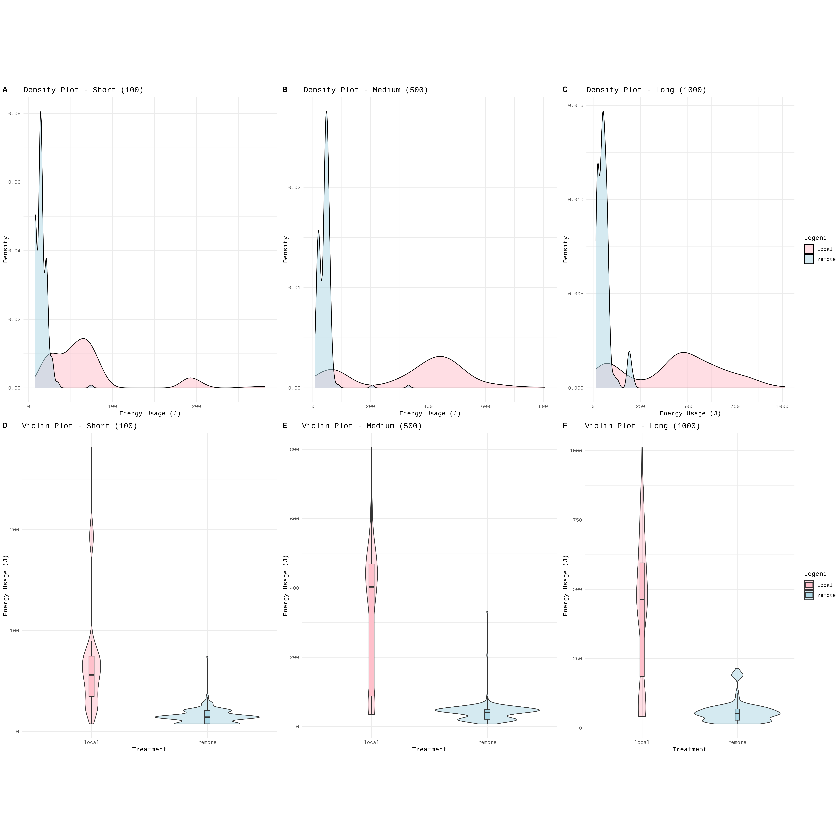

In [ ]:
img <- png::readPNG("./sample_data/grid_of_normality.png")  # Read the saved image
grid::grid.raster(img)  # Display the image

## QQ Plots

[1] 206  57

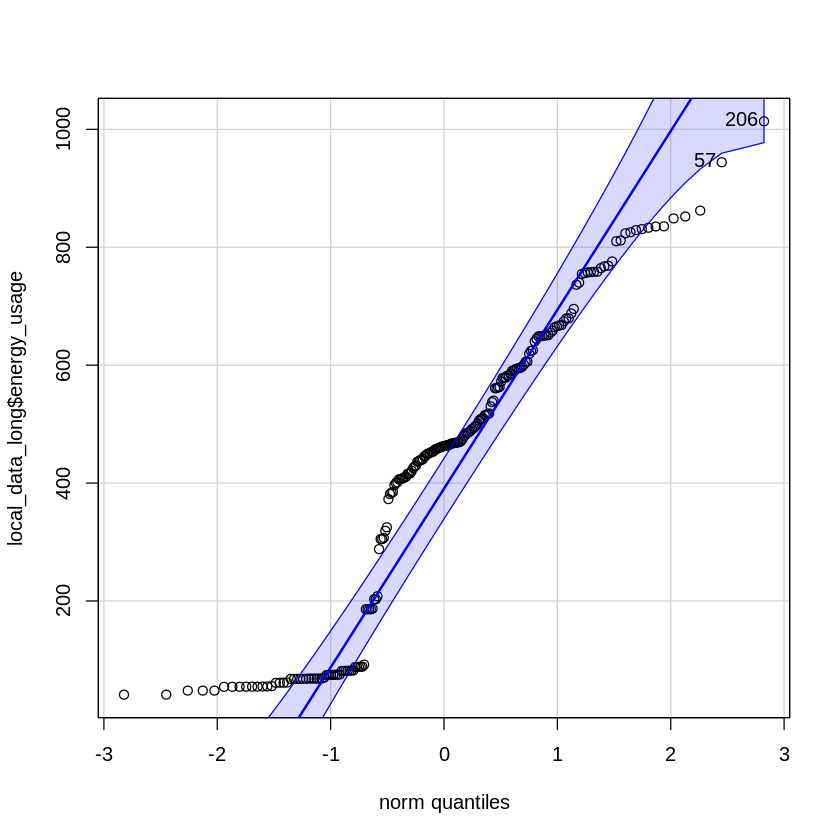

[1] 24 16

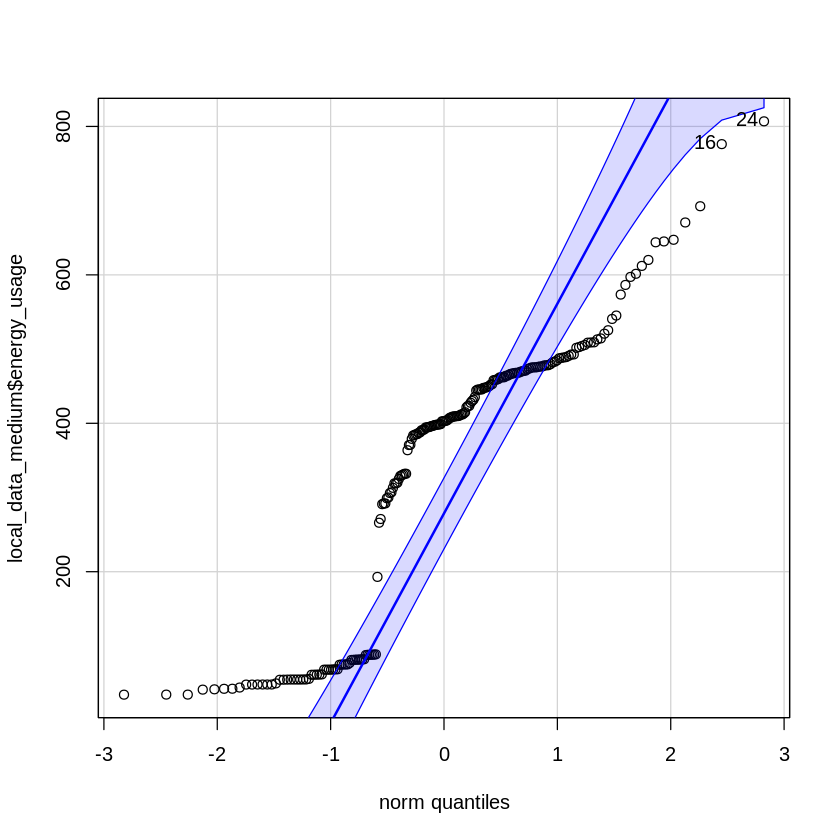

[1] 89 58

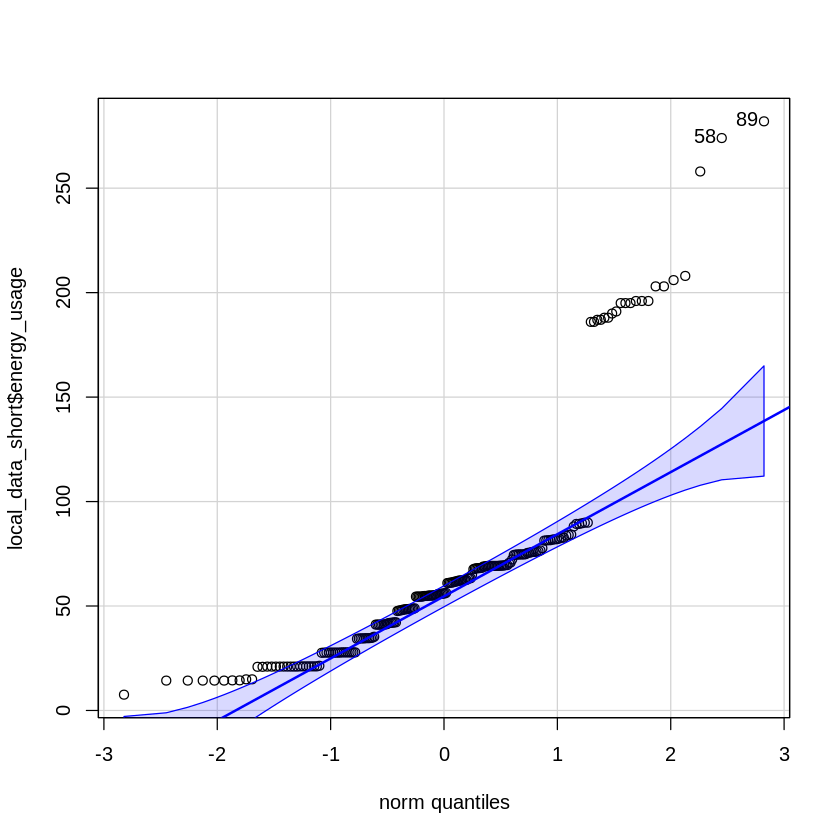

[1] 158  41

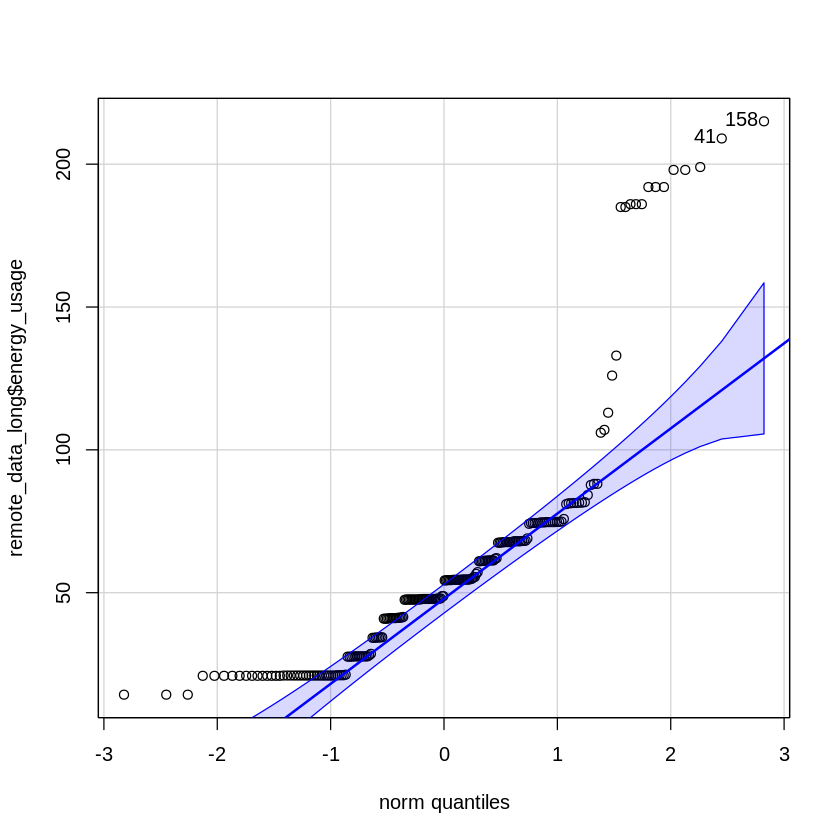

[1] 149  59

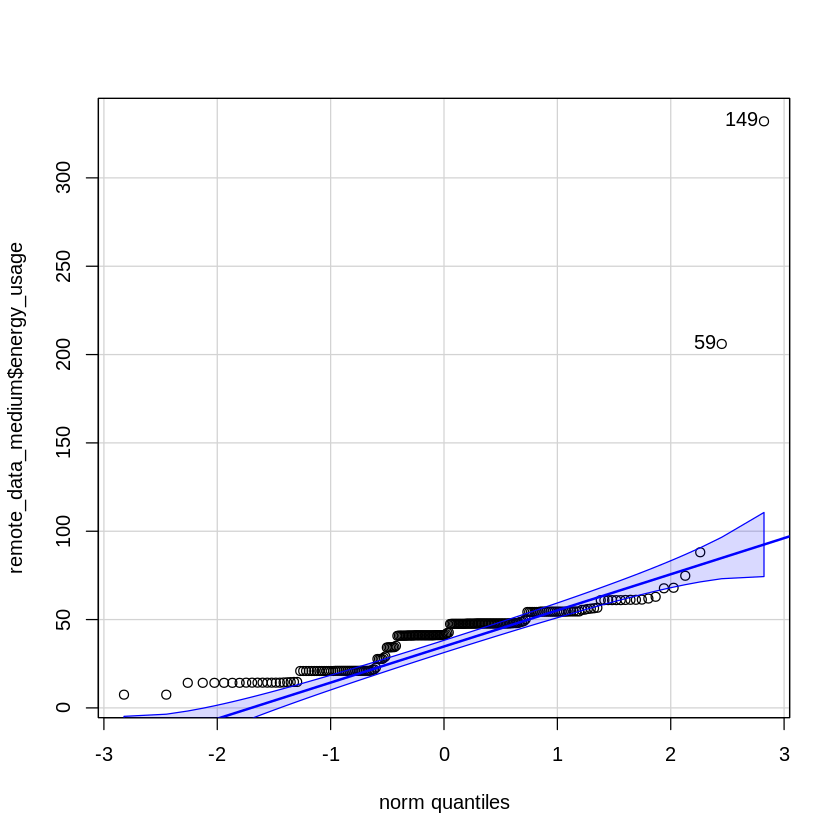

[1] 174 101

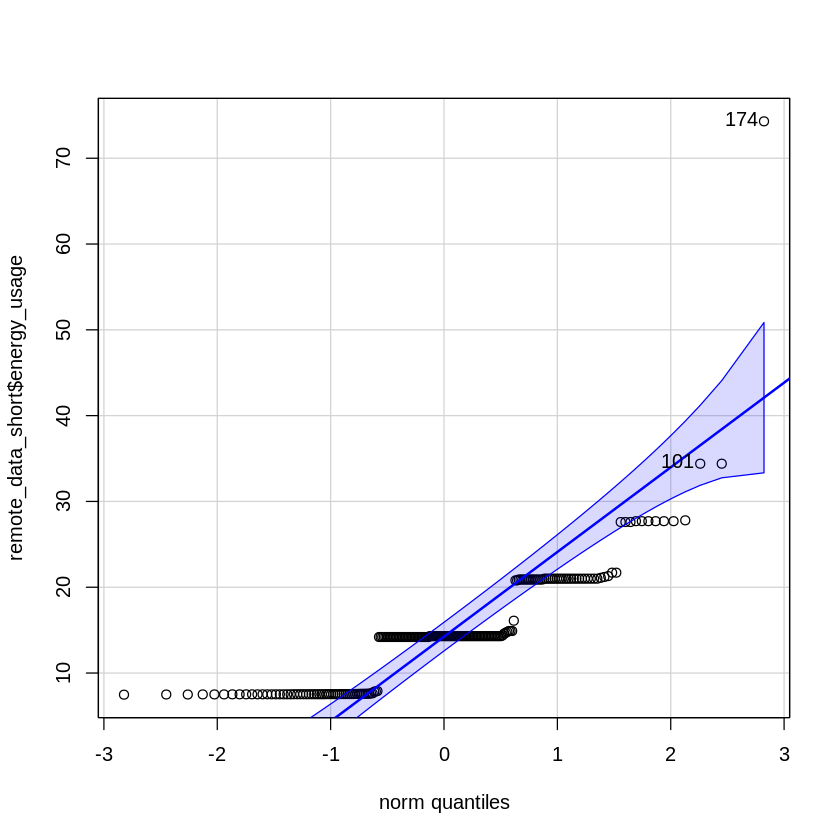

In [ ]:
qqPlot(local_data_long$energy_usage)
qqPlot(local_data_medium$energy_usage)
qqPlot(local_data_short$energy_usage)
qqPlot(remote_data_long$energy_usage)
qqPlot(remote_data_medium$energy_usage)
qqPlot(remote_data_short$energy_usage)

## Normality Testing on orginal data

### Shapiro-Wilks Test After Checking for possible transformations

* A low p-value (typically less than 0.05) indicates that the data significantly deviates from a normal distribution, providing evidence to reject the null hypothesis. In other words, it suggests non-normality.
* It is calculated during the Shapiro-Wilk test and is used to assess the degree of normality in the data. The value of W ranges between 0 and 1, where 1 indicates perfect normality.
* The smaller the W statistic, the stronger the evidence against the null hypothesis (the assumption that the data follows a normal distribution). Smaller W values suggest departures from normality.



In [ ]:
shapiro_local_long <- shapiro.test(local_data_long$energy_usage)
shapiro_local_medium <- shapiro.test(local_data_medium$energy_usage)
shapiro_local_small <- shapiro.test(local_data_short$energy_usage)
shapiro_remote_long <- shapiro.test(remote_data_long$energy_usage)
shapiro_remote_medium <- shapiro.test(remote_data_medium$energy_usage)
shapiro_remote_small <- shapiro.test(remote_data_short$energy_usage)

In [ ]:
cat("shapiro_local_long ",  "P_Value: ", shapiro_local_long$p.value, "W_Value: ", shapiro_local_long$statistic, "\n")
cat("shapiro_local_medium ",  "P_Value: ", shapiro_local_medium$p.value, "W_Value: ", shapiro_local_medium$statistic, "\n")
cat("shapiro_local_small ",  "P_Value: ", shapiro_local_small$p.value,"W_Value: ", shapiro_local_small$statistic, "\n")
cat("shapiro_remote_long ",  "P_Value: ", shapiro_remote_long$p.value,"W_Value: ", shapiro_remote_long$statistic, "\n")
cat("shapiro_remote_medium ",  "P_Value: ", shapiro_remote_medium$p.value,"W_Value: ", shapiro_remote_medium$statistic, "\n")
cat("shapiro_remote_small ",  "P_Value: ", shapiro_remote_small$p.value,"W_Value: ", shapiro_remote_small$statistic, "\n")

shapiro_local_long  P_Value:  7.857444e-09 W_Value:  0.9254728 
shapiro_local_medium  P_Value:  2.377152e-12 W_Value:  0.8713526 
shapiro_local_small  P_Value:  8.146716e-18 W_Value:  0.7420252 
shapiro_remote_long  P_Value:  1.459419e-17 W_Value:  0.7494984 
shapiro_remote_medium  P_Value:  2.821722e-23 W_Value:  0.5364082 
shapiro_remote_small  P_Value:  4.943907e-18 W_Value:  0.7354935 


## Find Skewed Data and apply transformation regardingly to check if normality of data is enhanced

In [ ]:
### starts here
# see if data is skewed positively, negatively or not at all
check_skew <- function(skew){
  if (skew > 0) {
  return("Positively Skewed")
} else if (skew < 0) {
  return("Negatively Skewed")
} else {
  return("Symmetric")
}
}

In [ ]:
# transform the data pairs to normality to see if the same transformation can be applied to the data to make it fit a normal distribution
transform_pairs_towards_normality <- function(local,remote, name){

# calculate skewness of datasets
local_skew <- skewness(local)
remote_skew <- skewness(remote)

results_skew_local <- check_skew(local_skew)
results_skew_remote <- check_skew(remote_skew)
cat(name," local: ", results_skew_local, "\n")
cat(name," remote: ", results_skew_remote, "\n")

# check how much the data is skewed in what direction and apply transformation according to the skew:

if(results_skew_local == results_skew_remote){
  if(results_skew_local == "Positively Skewed"){
  # sqrt(small skew)/log(larger skew) for positive skew transformation
  local_sqrt = sqrt(local)
  remote_sqrt = sqrt(remote)
  local_log = log(local)
  remote_log = log(remote)

  # test normality differences
  shapiro_local <- shapiro.test(local)
  shapiro_remote <- shapiro.test(remote)
  shapiro_local_sqrt <- shapiro.test(local_sqrt)
  shapiro_remote_sqrt <- shapiro.test(remote_sqrt)
  shapiro_local_log <- shapiro.test(local_log)
  shapiro_remote_log <- shapiro.test(remote_log)

  cat(name, " local before transformation: ", shapiro_local$p.value, "sqrt: ",shapiro_local_sqrt$p.value, "log: ",shapiro_local_log$p.value)
  cat(name, " local before transformation: ", shapiro_remote$p.value, "sqrt: ",shapiro_remote_sqrt$p.value, "log: ",shapiro_remote_log$p.value)
  }
  else{
  # power^2(small skew)/power^3(larger skew) for negative skew transformation
  local_power = local^2
  remote_power = remote^2
  local_power3 = local^3
  remote_power3 = remote^3

  # test normality differences
  shapiro_local <- shapiro.test(local)
  shapiro_remote <- shapiro.test(remote)
  shapiro_local_power <- shapiro.test(local_power)
  shapiro_remote_power <- shapiro.test(remote_power)
  shapiro_local_power3 <- shapiro.test(local_power3)
  shapiro_remote_power3 <- shapiro.test(remote_power3)

  cat(name, " local before transformation: ", shapiro_local$p.value, "power 2: ",shapiro_local_power$p.value, "power 3: ",shapiro_local_power3$p.value, "\n")
  cat(name, " local before transformation: ", shapiro_remote$p.value, "power 2: ",shapiro_remote_power$p.value, "power 3: ",shapiro_remote_power3$p.value, "\n")
  }
} else{
  print("local and remote datasets are not skewed similarly which is why no transformation is applied")
}
# Determine skewness type

}

In [ ]:
test_local_long = local_data_long$energy_usage
test_remote_long = remote_data_long$energy_usage
test_local_medium = local_data_medium$energy_usage
test_remote_medium = remote_data_medium$energy_usage
test_local_small = local_data_short$energy_usage
test_remote_small = remote_data_short$energy_usage

In [ ]:
### ends here
transform_pairs_towards_normality(test_local_long,test_remote_long, "Long Dataset")
transform_pairs_towards_normality(test_local_medium,test_remote_medium, "Medium Dataset")
transform_pairs_towards_normality(test_local_small,test_remote_small, "Short Dataset")

Long Dataset  local:  Negatively Skewed 
Long Dataset  remote:  Positively Skewed 
[1] "local and remote datasets are not skewed similarly which is why no transformation is applied"
Medium Dataset  local:  Negatively Skewed 
Medium Dataset  remote:  Positively Skewed 
[1] "local and remote datasets are not skewed similarly which is why no transformation is applied"
Short Dataset  local:  Positively Skewed 
Short Dataset  remote:  Positively Skewed 
Short Dataset  local before transformation:  8.146716e-18 sqrt:  1.075057e-11 log:  4.141542e-06Short Dataset  local before transformation:  4.943907e-18 sqrt:  4.995805e-14 log:  4.813029e-13

## Hypothesis Testing

## non-parametric Wilcoxon rank-sum test

In [ ]:
long <- wilcox.test(local_data_long$energy_usage, remote_data_long$energy_usage, alternative = "two.sided")
medium <- wilcox.test(local_data_medium$energy_usage, remote_data_medium$energy_usage, alternative = "two.sided")
short <- wilcox.test(local_data_short$energy_usage, remote_data_short$energy_usage, alternative = "two.sided")
# Print the test result
cat("Small Dataset: ", "\n")
print(short)
cat("Medium Dataset: ", "\n")
print(medium)
cat("Long Dataset: ", "\n")
print(long)

Small Dataset:  

	Wilcoxon rank sum test with continuity correction

data:  local_data_short$energy_usage and remote_data_short$energy_usage
W = 42544, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0

Medium Dataset:  

	Wilcoxon rank sum test with continuity correction

data:  local_data_medium$energy_usage and remote_data_medium$energy_usage
W = 42329, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0

Long Dataset:  

	Wilcoxon rank sum test with continuity correction

data:  local_data_long$energy_usage and remote_data_long$energy_usage
W = 41157, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



## Effect Size Estimation

### r Effect Size Estimation with cliffs delta for long Dataset


In [ ]:
# Calculate Cliff's Delta for your datasets
cliffs_delta_value_long <- effsize::cliff.delta(local_data_long$energy_usage,remote_data_long$energy_usage)
cliffs_delta_value_medium <- effsize::cliff.delta(local_data_medium$energy_usage,remote_data_medium$energy_usage)
cliffs_delta_value_short <- effsize::cliff.delta(local_data_short$energy_usage, remote_data_short$energy_usage)

In [ ]:
# Print the result
print("\n")
print("Cliff's Delta Long Dataset:")
print(cliffs_delta_value_long)
print("Cliff's Delta Medium Dataset:")
print(cliffs_delta_value_medium)
print("Cliff's Delta Small Dataset:")
print(cliffs_delta_value_short)

[1] "\n"
[1] "Cliff's Delta Long Dataset:"

Cliff's Delta

delta estimate: 0.8665306 (large)
95 percent confidence interval:
    lower     upper 
0.8158975 0.9039746 

[1] "Cliff's Delta Medium Dataset:"

Cliff's Delta

delta estimate: 0.9196825 (large)
95 percent confidence interval:
    lower     upper 
0.8765056 0.9481805 

[1] "Cliff's Delta Small Dataset:"

Cliff's Delta

delta estimate: 0.9294104 (large)
95 percent confidence interval:
    lower     upper 
0.8902723 0.9549215 

